no display found. Using non-interactive Agg backend


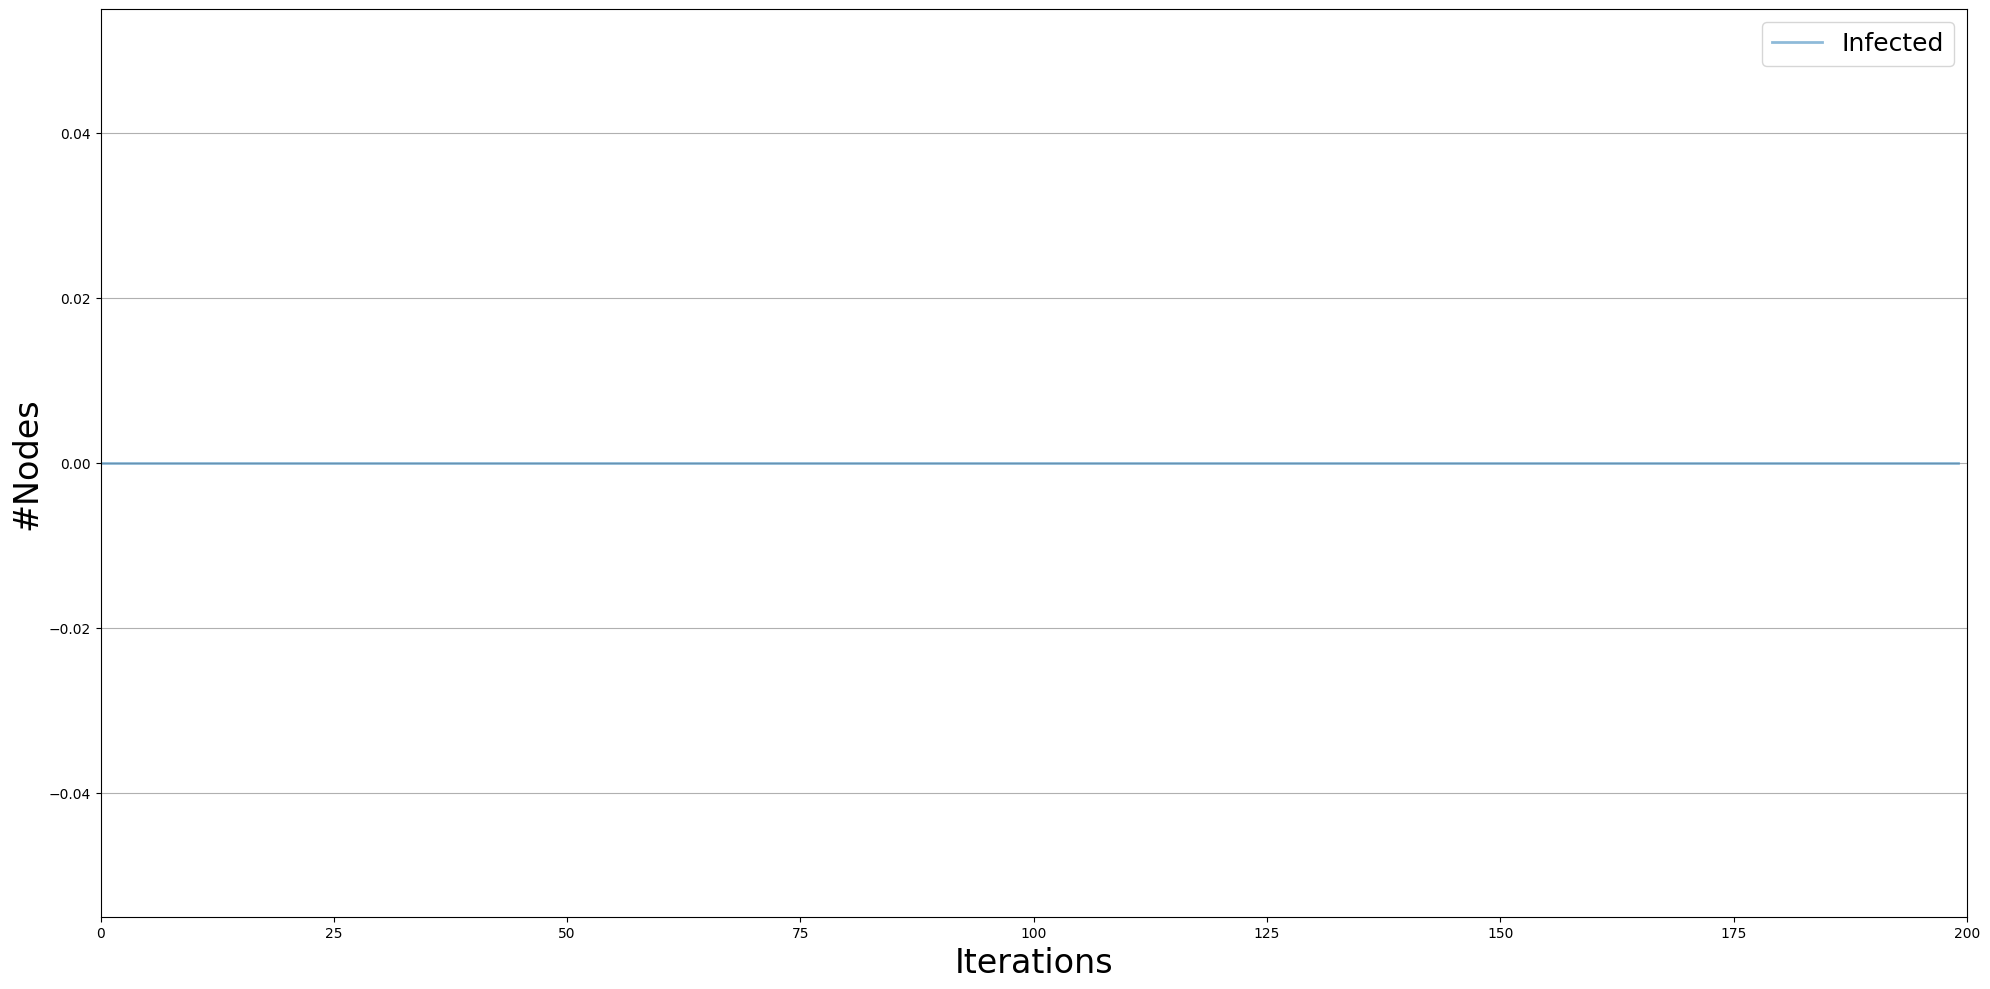

AttributeError: 'DiffusionPrevalence' object has no attribute 'p'

In [1]:
import networkx as nx
import ndlib.models.ModelConfig as mc
import ndlib.models.opinions as op
from ndlib.viz.mpl.DiffusionTrend import DiffusionTrend
from ndlib.viz.mpl.DiffusionPrevalence import DiffusionPrevalence


# Network topology
g = nx.erdos_renyi_graph(1000, 0.1)

# Model selection
model = op.CognitiveOpDynModel(g)

# Model Configuration
config = mc.Configuration()
config.add_model_parameter("I", 0.15)
config.add_model_parameter("B_range_min", 0)
config.add_model_parameter("B_range_max", 1)
config.add_model_parameter("T_range_min", 0)
config.add_model_parameter("T_range_max", 1)
config.add_model_parameter("R_fraction_negative", 1.0 / 3)
config.add_model_parameter("R_fraction_neutral", 1.0 / 3)
config.add_model_parameter("R_fraction_positive", 1.0 / 3)
config.add_model_parameter('fraction_infected', 0.1)
model.set_initial_status(config)

# Simulation execution
iterations = model.iteration_bunch(200)
trends = model.build_trends(iterations)

%matplotlib inline
viz = DiffusionTrend(model, trends)
viz.plot()
viz = DiffusionPrevalence(model, trends)
viz.p